# Altair

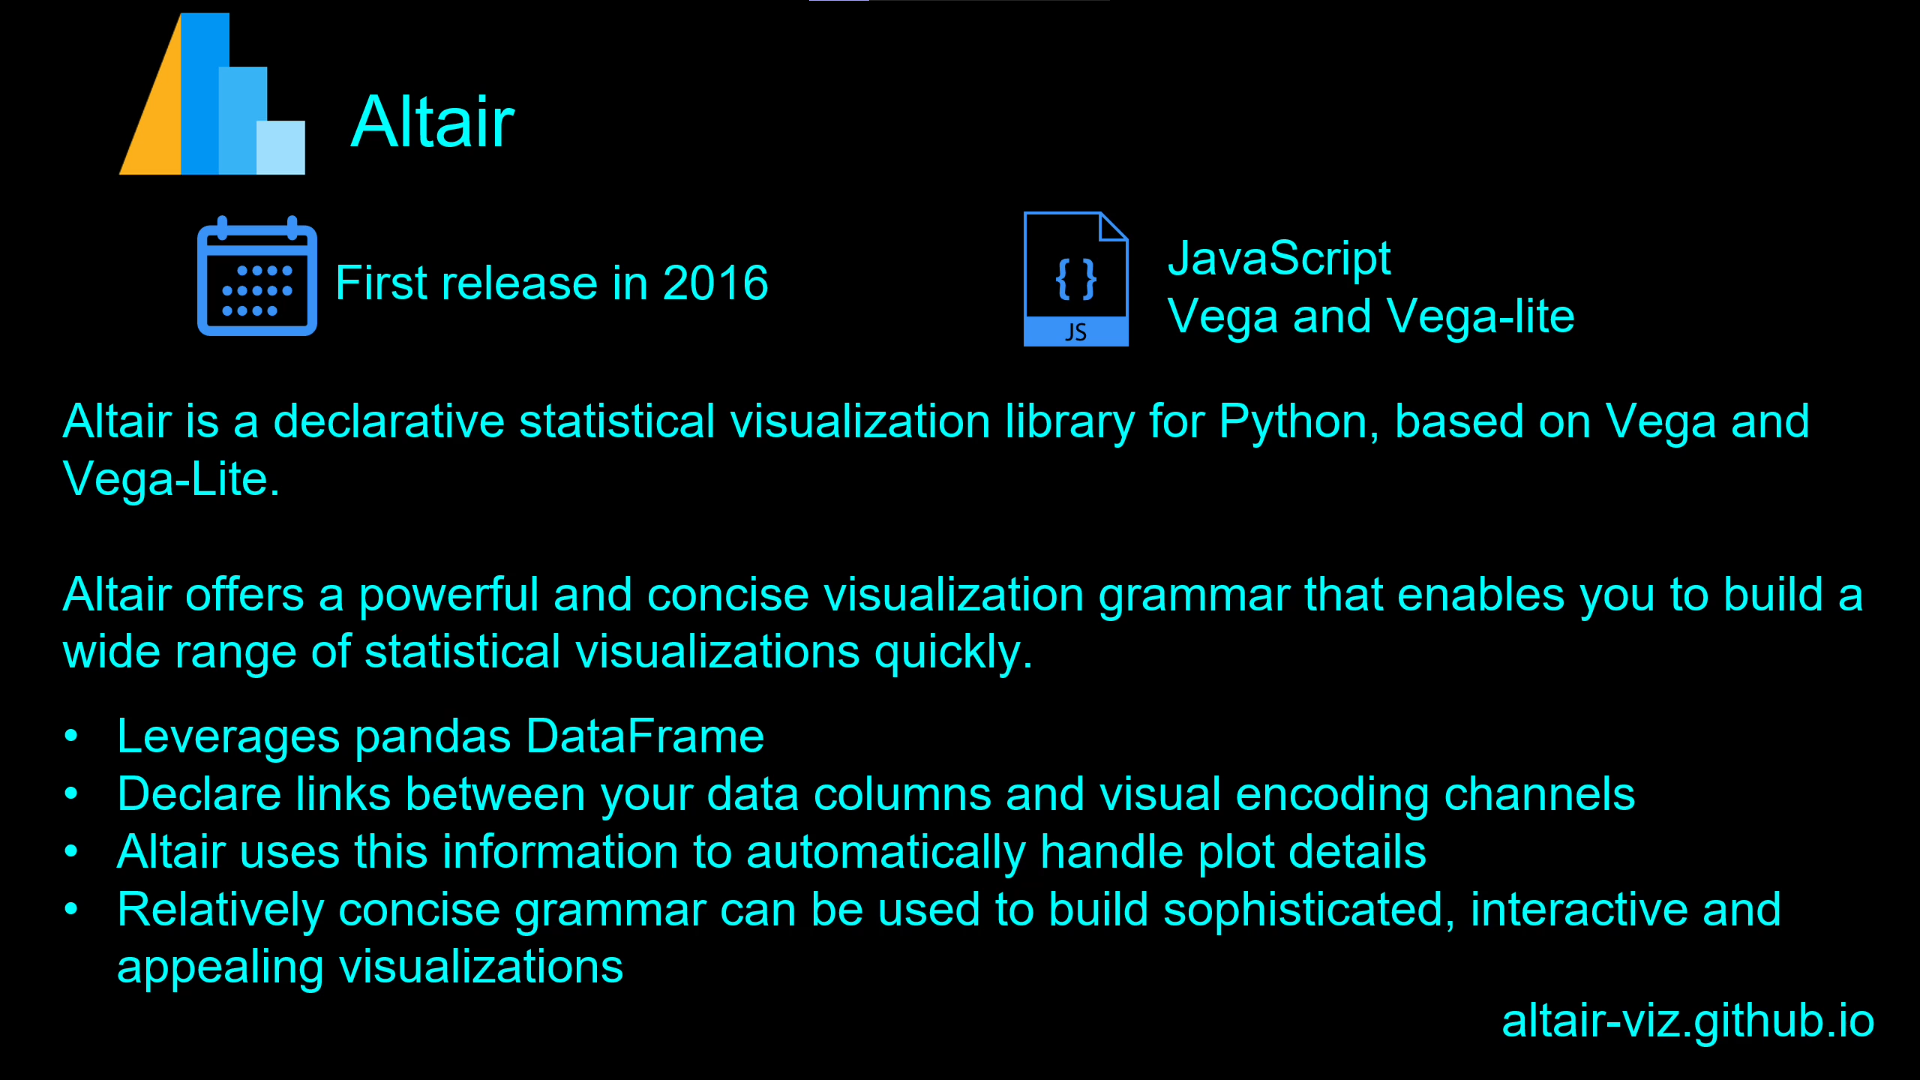

In [1]:
# !pip install altair_saver

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

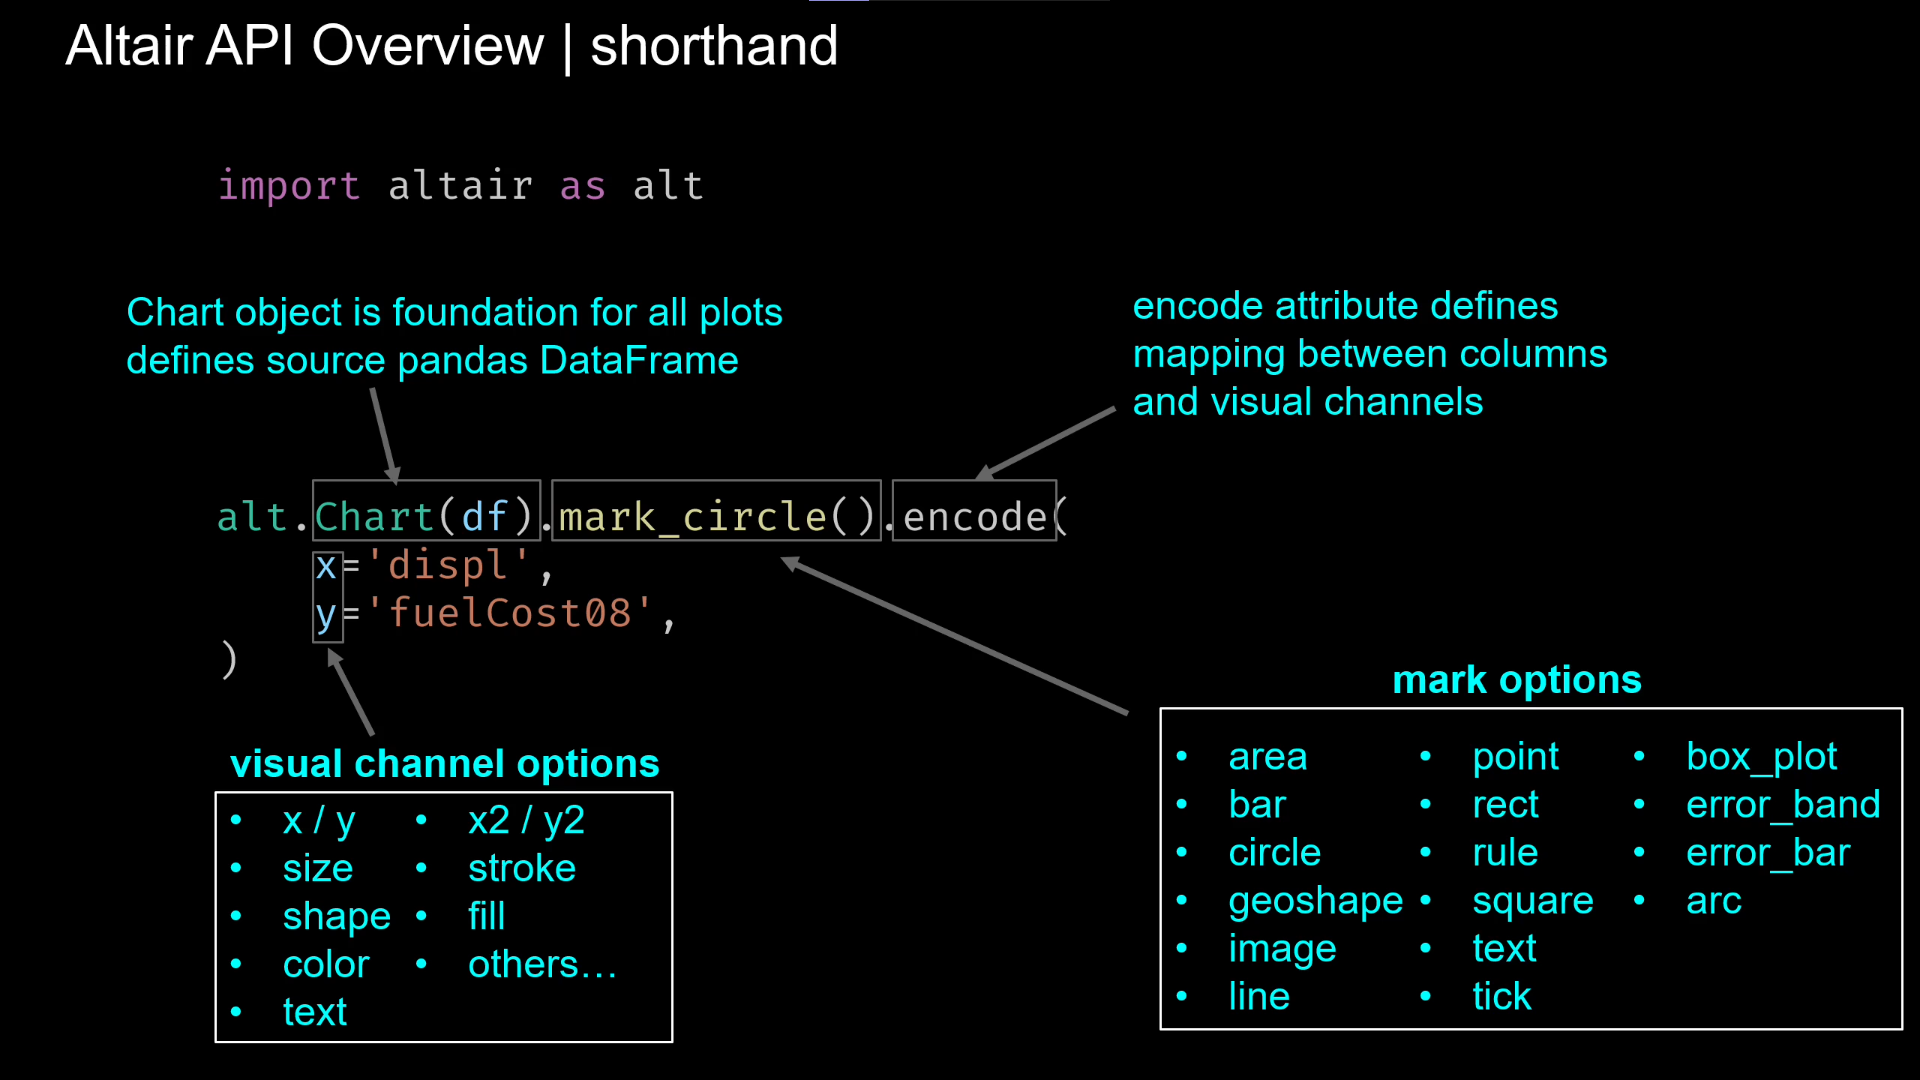

In [3]:
df = pd.read_csv('EPA_fuel_economy_summary.csv')

In [5]:
df.head(1)

make model  year transmission drive date_range fuel_type_summary  \
0  Acura   NSX  2000    Automatic   2WD  2000-2010               Gas   

  class_summary  cylinders  displ  co2  barrels08  fuelCost08  highway08  \
0           Car        6.0    3.0   -1  18.311667        2600         22   

   city08  comb08  
0      15      18

In [8]:
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [10]:
alt.Chart(df).mark_circle().encode(
    x= 'displ',
    y='fuelCost08'
)

alt.Chart(...)

In [11]:
alt.Chart(df).mark_point().encode(
    x= 'displ',
    y='fuelCost08'
)

alt.Chart(...)

In [12]:
alt.Chart(df).mark_point().encode(
    x= 'displ',
    y='fuelCost08',
    color='drive',
    # shape='drive'
)

alt.Chart(...)

In [13]:
alt.Chart(df).mark_point().encode(
    x= 'displ',
    y='fuelCost08',
    color='drive',
    shape='drive'
)

alt.Chart(...)

In [14]:
alt.Chart(df).mark_bar().encode(
    x= 'fuelCost08',
    y='count()'
)

alt.Chart(...)

In [16]:
alt.Chart(df).mark_tick().encode(
    y='fuel_type_summary',
    x='barrels08'
)

alt.Chart(...)

In [17]:
alt.Chart(df).mark_boxplot().encode(
    y='fuelCost08',
    x='year'
)

alt.Chart(...)

In [20]:
alt.Chart(df).mark_boxplot().encode(
    x='year:O',
    y='fuelCost08:Q'
)

alt.Chart(...)

In [21]:
alt.Chart(df).mark_bar().encode(
    x='mean(fuelCost08)',
    y='year'
)

alt.Chart(...)

In [24]:
alt.Chart(df).mark_bar().encode(
    x='mean(fuelCost08)',
    y='year:O'
)

alt.Chart(...)

In [27]:
alt.Chart(df).mark_bar().encode(
    alt.X('fuelCost08', type='quantitative', bin=True),
    alt.Y(aggregate='count', type='quantitative')
)

alt.Chart(...)

In [29]:
alt.Chart(df).mark_bar().encode(
    alt.X('fuelCost08:Q', bin=alt.Bin(extent=[0,5000],step=250)),
    alt.Y('count()')
)

alt.Chart(...)

In [32]:
alt.Chart(df).mark_point().encode(
    alt.X('displ', type='quantitative'),
    alt.Y('fuelCost08'),
    alt.Color('cylinders', type='nominal')
)

alt.Chart(...)

In [32]:
alt.Chart(df).mark_point().encode(
    alt.X('displ', type='quantitative'),
    alt.Y('fuelCost08'),
    alt.Color('cylinders', type='nominal')
)

alt.Chart(...)

In [32]:
alt.Chart(df).mark_point().encode(
    alt.X('displ', type='quantitative'),
    alt.Y('fuelCost08'),
    alt.Color('cylinders', type='nominal')
)

alt.Chart(...)

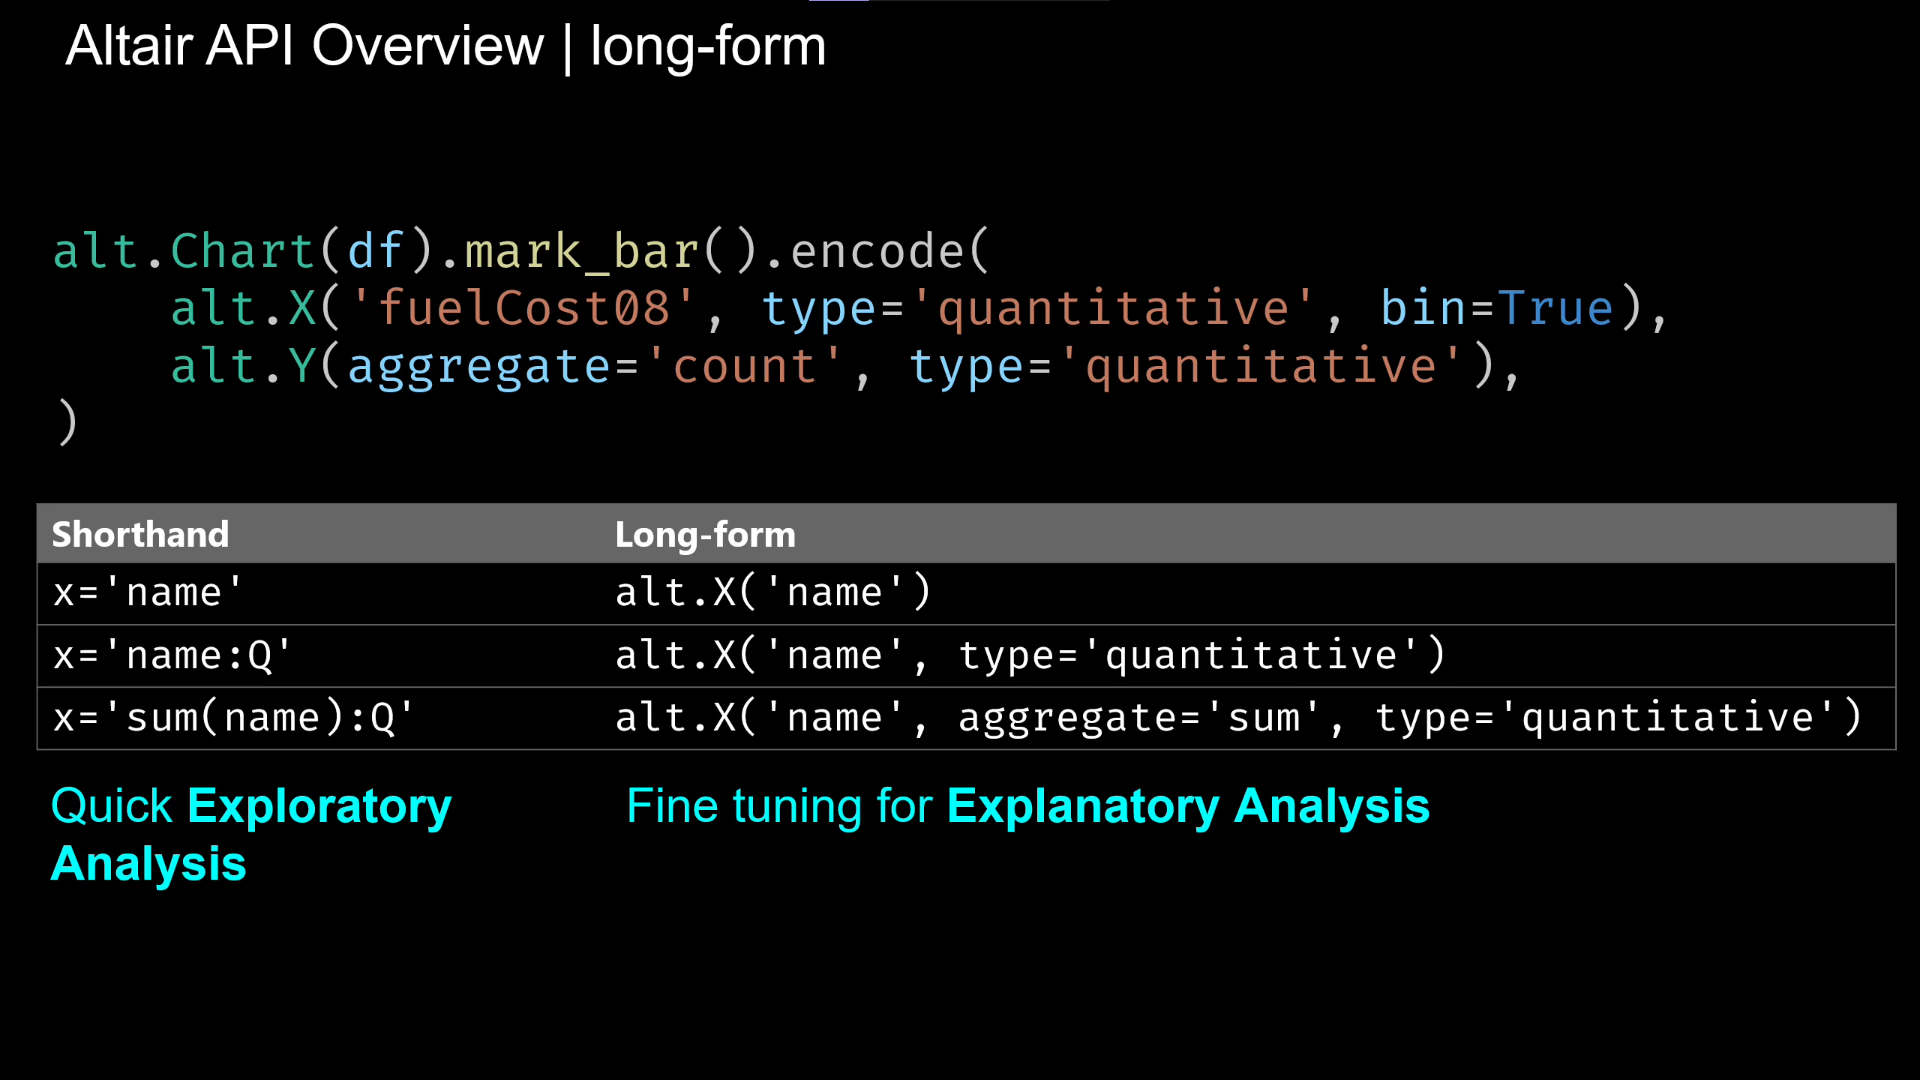

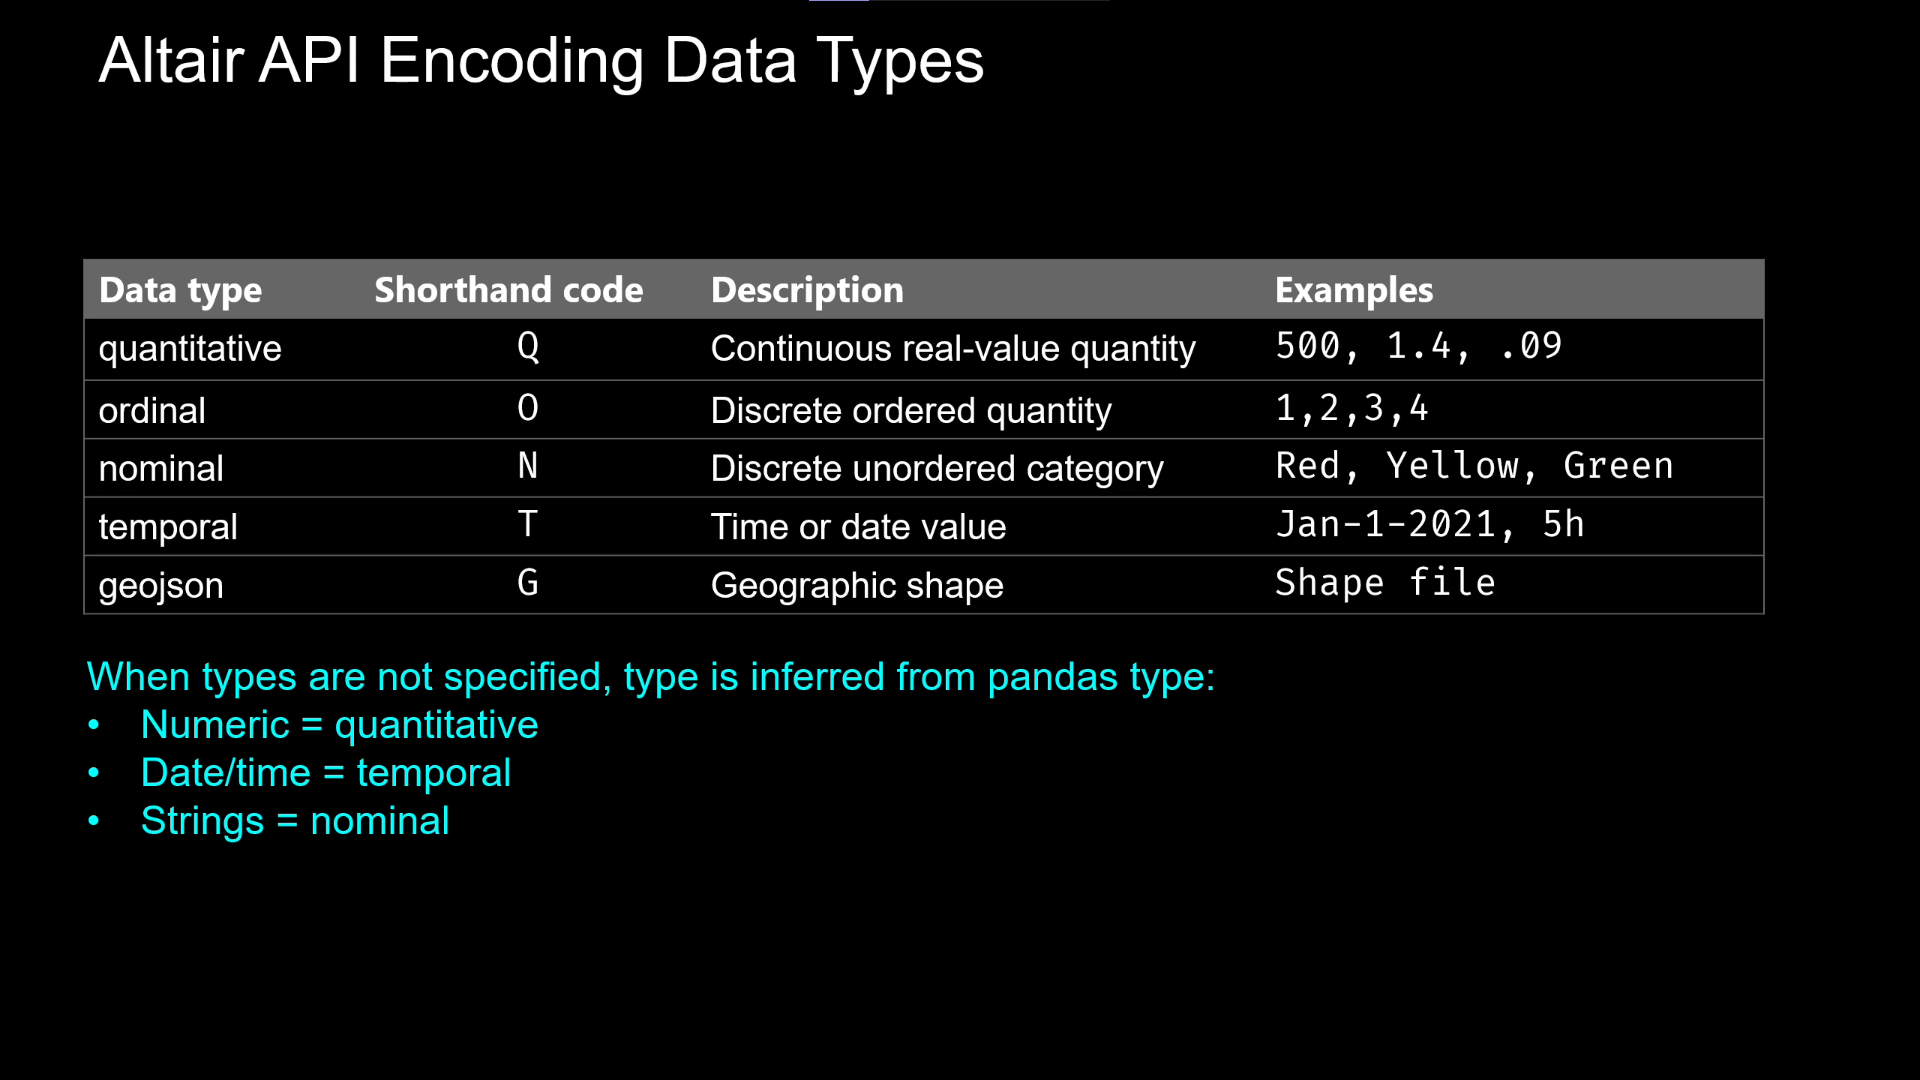

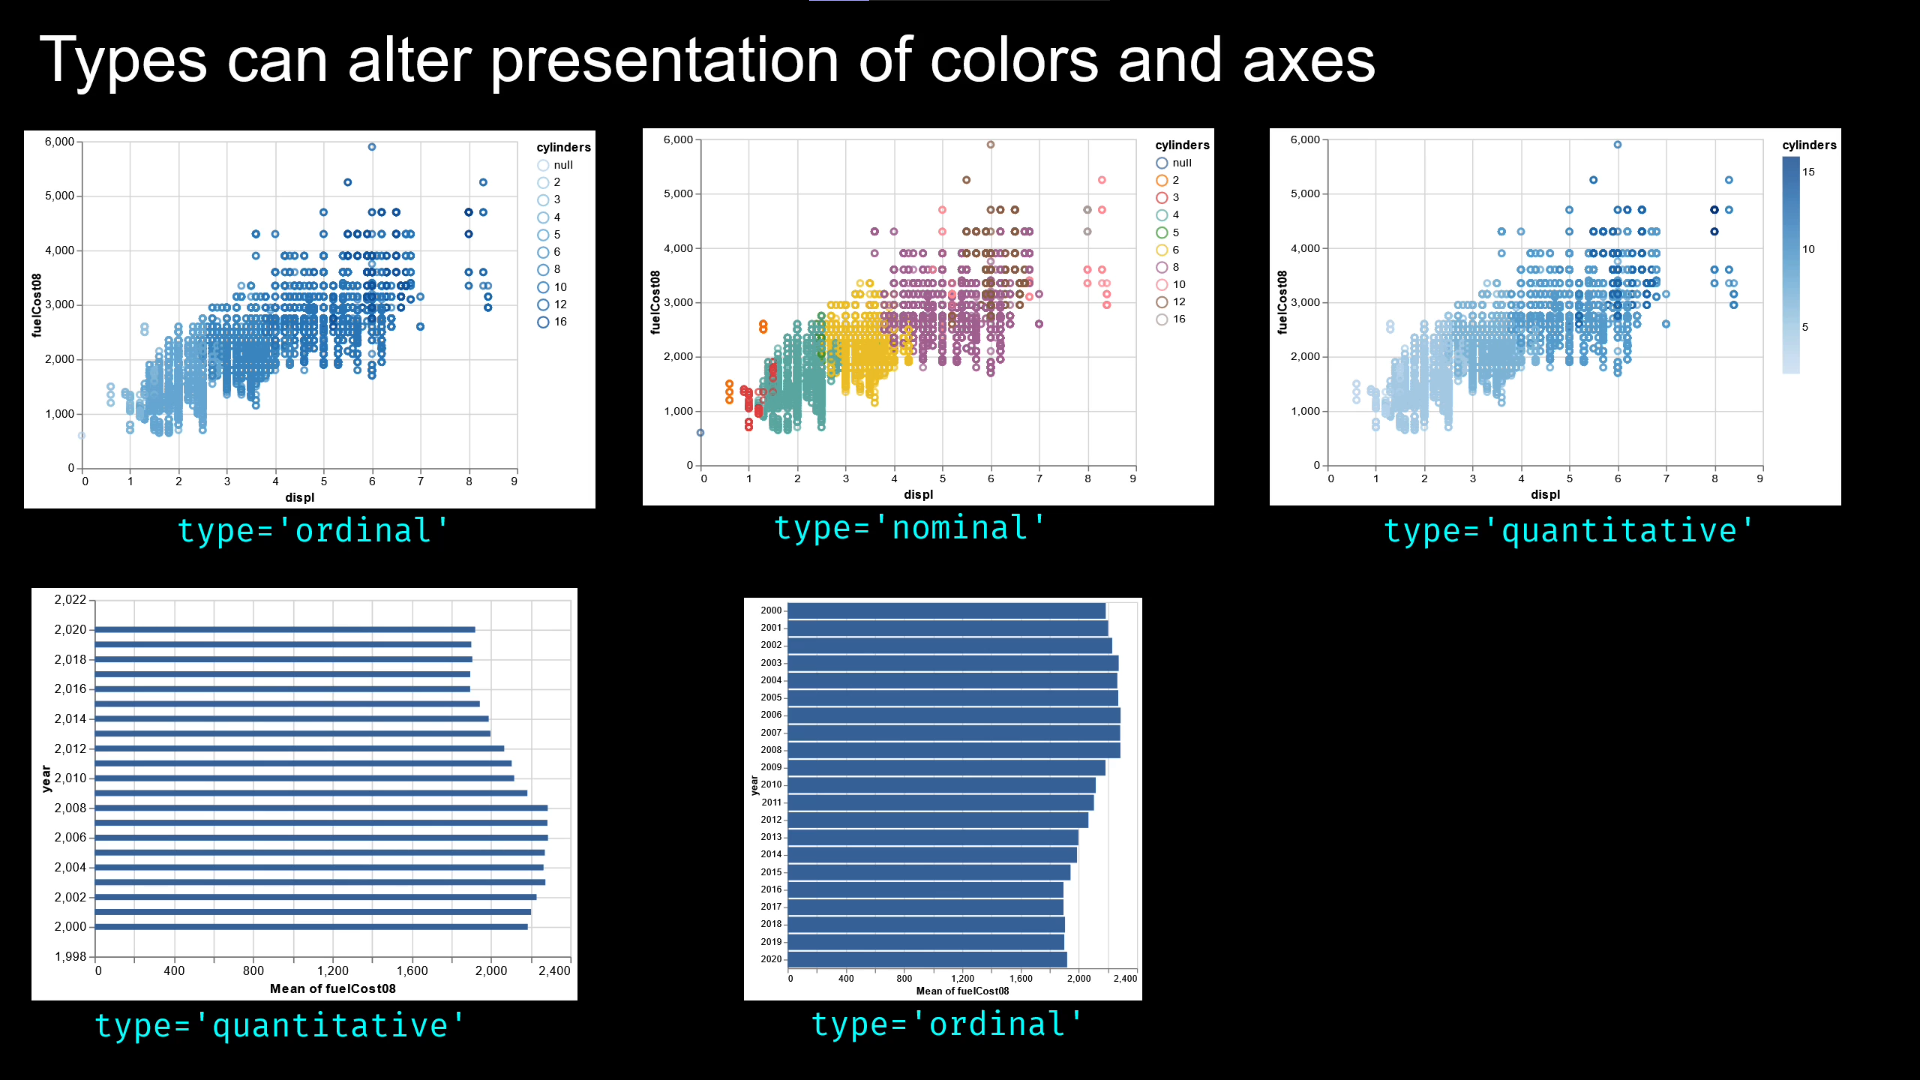

In [34]:
alt.Chart(df).mark_circle().encode(
    x='displ',
    y='fuelCost08',
    tooltip=['make', 'model', 'year'],
).interactive()

alt.Chart(...)

In [38]:
chart1 = alt.Chart(df).mark_tick().encode(
    y='fuel_type_summary',
    x='barrels08'
)
chart2 = alt.Chart(df).mark_bar().encode(
    alt.X('barrels08:Q', bin=True),
    alt.Y('count()')
)

chart1 | chart2

alt.HConcatChart(...)

In [41]:
chart2 & chart1

alt.VConcatChart(...)

In [41]:
chart2 & chart1

alt.VConcatChart(...)

In [42]:
alt.hconcat(chart1, chart2)

alt.HConcatChart(...)

In [43]:
alt.vconcat(chart1, chart2)

alt.VConcatChart(...)

In [48]:
alt.Chart(df).mark_circle(size=50).encode(
    x='displ',
    y='fuelCost08',
    color='class_summary:N',
    tooltip=['make', 'model', 'year']
).facet('class_summary:N', columns=2)

alt.FacetChart(...)

In [48]:
alt.Chart(df).mark_circle(size=50).encode(
    x='displ',
    y='fuelCost08',
    color='class_summary:N',
    tooltip=['make', 'model', 'year']
).facet('class_summary:N', columns=2)

alt.FacetChart(...)

In [53]:
rule = alt.Chart(df).mark_rule(color='red').encode(
    x='mean(fuelCost08):Q'
)

In [53]:
rule = alt.Chart(df).mark_rule(color='red').encode(
    x='mean(fuelCost08):Q'
)

In [54]:
bars+rule

alt.LayerChart(...)

In [56]:
text = bars.mark_text(align='left',dx=3).encode(
    text=alt.Text('mean(fuelCost08):Q', format=',.0f'))

In [57]:
bars+rule+text

alt.LayerChart(...)

In [63]:
(bars+rule+text).properties(width=600)

alt.LayerChart(...)

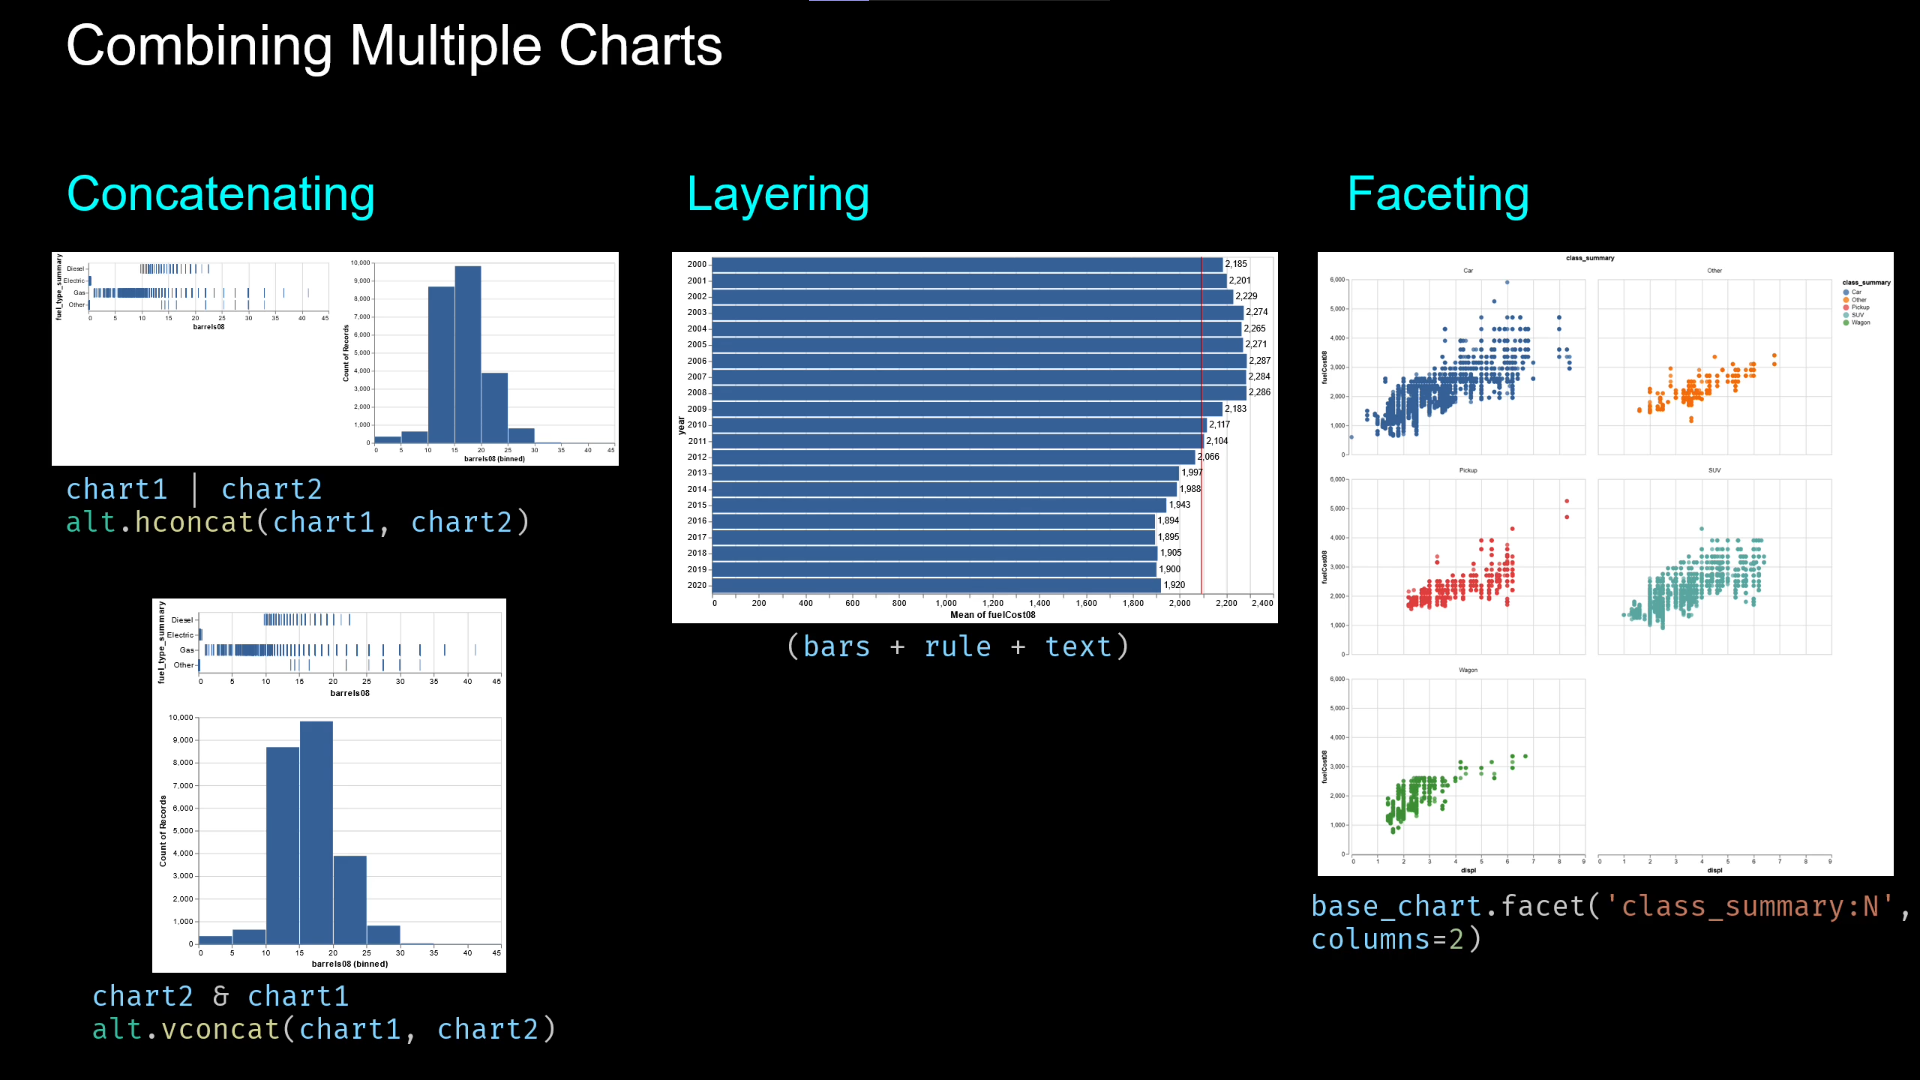

## New dataset

In [66]:
# !pip install openpyxl

     -------------------------------------- 249.8/249.8 kB 3.8 MB/s eta 0:00:00
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [67]:
df = pd.read_excel('AmazonBooks.xlsx')

In [68]:
df.head()

Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price    Year        Genre  
0                  JJ Smith          4.7  17350.0    8.0  2016.0  Non Fiction  
1              Stephen King          4.6   2052.0   22.0  2011.0      Fiction  
2        Jordan B. Peterson          4.7  18979.0   15.0  2018.0  Non Fiction  
3             George Orwell          4.7  21424.0    6.0  2017.0      Fiction  
4  National Geographic Kids          4.8   7665.0   12.0  2019.0  Non Fiction

In [70]:
alt.Chart(df).mark_bar().encode(
    alt.Y('Year:O', title='Published Year'),
    alt.X('sum(Reviews)',title='Number of Reviews'),
    color='Genre'
)

alt.Chart(...)

In [71]:
alt.Chart(df).mark_rect().encode(
    x='Year:O',
    y='Genre:O',
    color='mean(Price):Q',
    tooltip=[alt.Tooltip('mean(Price):Q', format='$.2f'),
             alt.Tooltip('count(Name):Q', format='.0f')]
)

alt.Chart(...)

In [76]:
top_authors = list(df.groupby(['Author'], as_index=False).agg(
    {'Reviews':'sum'}).nlargest(20,columns=['Reviews'])['Author'])

In [77]:
top_authors

['Suzanne Collins',
 'Michelle Obama',
 'John Green',
 'Delia Owens',
 'Gary Chapman',
 'E L James',
 'Dr. Seuss',
 'Eric Carle',
 'Gillian Flynn',
 'Paula Hawkins',
 'Laura Hillenbrand',
 'Harper Lee',
 'Don Miguel Ruiz',
 'Dale Carnegie',
 'Sarah Young',
 'Craig Smith',
 'Stephenie Meyer',
 'R. J. Palacio',
 'Kristin Hannah',
 'Mary L. Trump Ph.D. ']

In [89]:
# list(df.groupby('Author')['Reviews'].sum(
# ).sort_values(ascending=False).head(20).index)

In [105]:
alt.Chart(df.query('Author == @top_authors')).mark_circle(
    opacity=0.8,
    stroke='black',
    strokeWidth=1
).encode(
    alt.Y('Author'),
    alt.X('Year:O'),
    alt.Size('sum(Reviews)',
             scale=alt.Scale(range=[0,300]),
             legend=alt.Legend(title='Reviews')),
    alt.Color('Author'))

alt.Chart(...)

In [107]:
alt.Chart(df.query('Author == @top_authors')).mark_circle(
    opacity=0.8,
    stroke='black',
    strokeWidth=1
).encode(
    alt.Y('Author'),
    alt.X('Year:O'),
    alt.Size('sum(Reviews)',
             scale=alt.Scale(range=[0,300]),
             legend=alt.Legend(title='Reviews')),
    alt.Color('Author', legend=None))

alt.Chart(...)

In [112]:
alt.Chart(df).mark_circle(opacity=0.8,
    stroke='black',
    strokeWidth=1
).encode(
    alt.X('Year:O'),
    alt.Y('Author'),
    alt.Size('sum(Reviews)',
            scale=alt.Scale(range=[0,900]),
            legend=alt.Legend(title='Reviews')),
    alt.Color('Author',legend=None)
).configure_axis(
    grid=True
).transform_filter(
    alt.FieldOneOfPredicate(field='Author',
                           oneOf=top_authors)
).properties(
    width=550,
    height=475,
    title='Amazon Author Reviews')

alt.Chart(...)

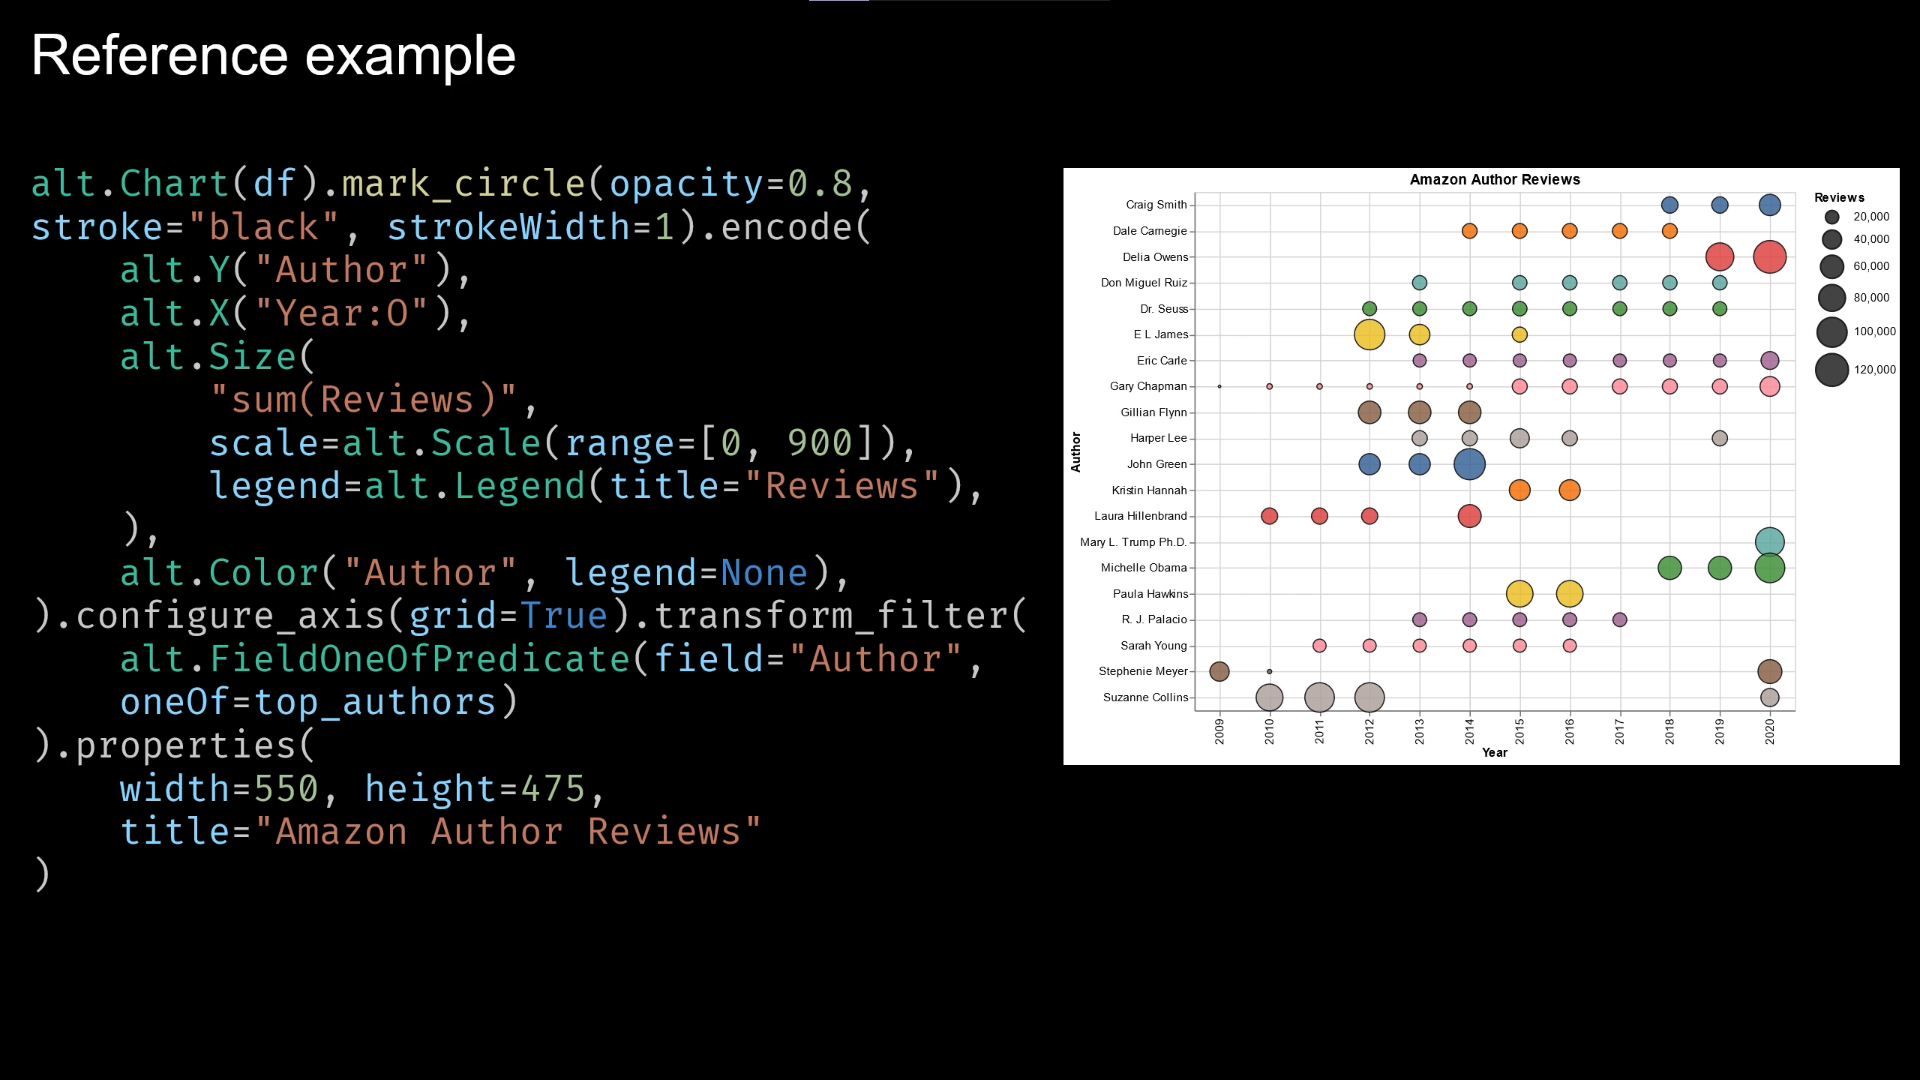

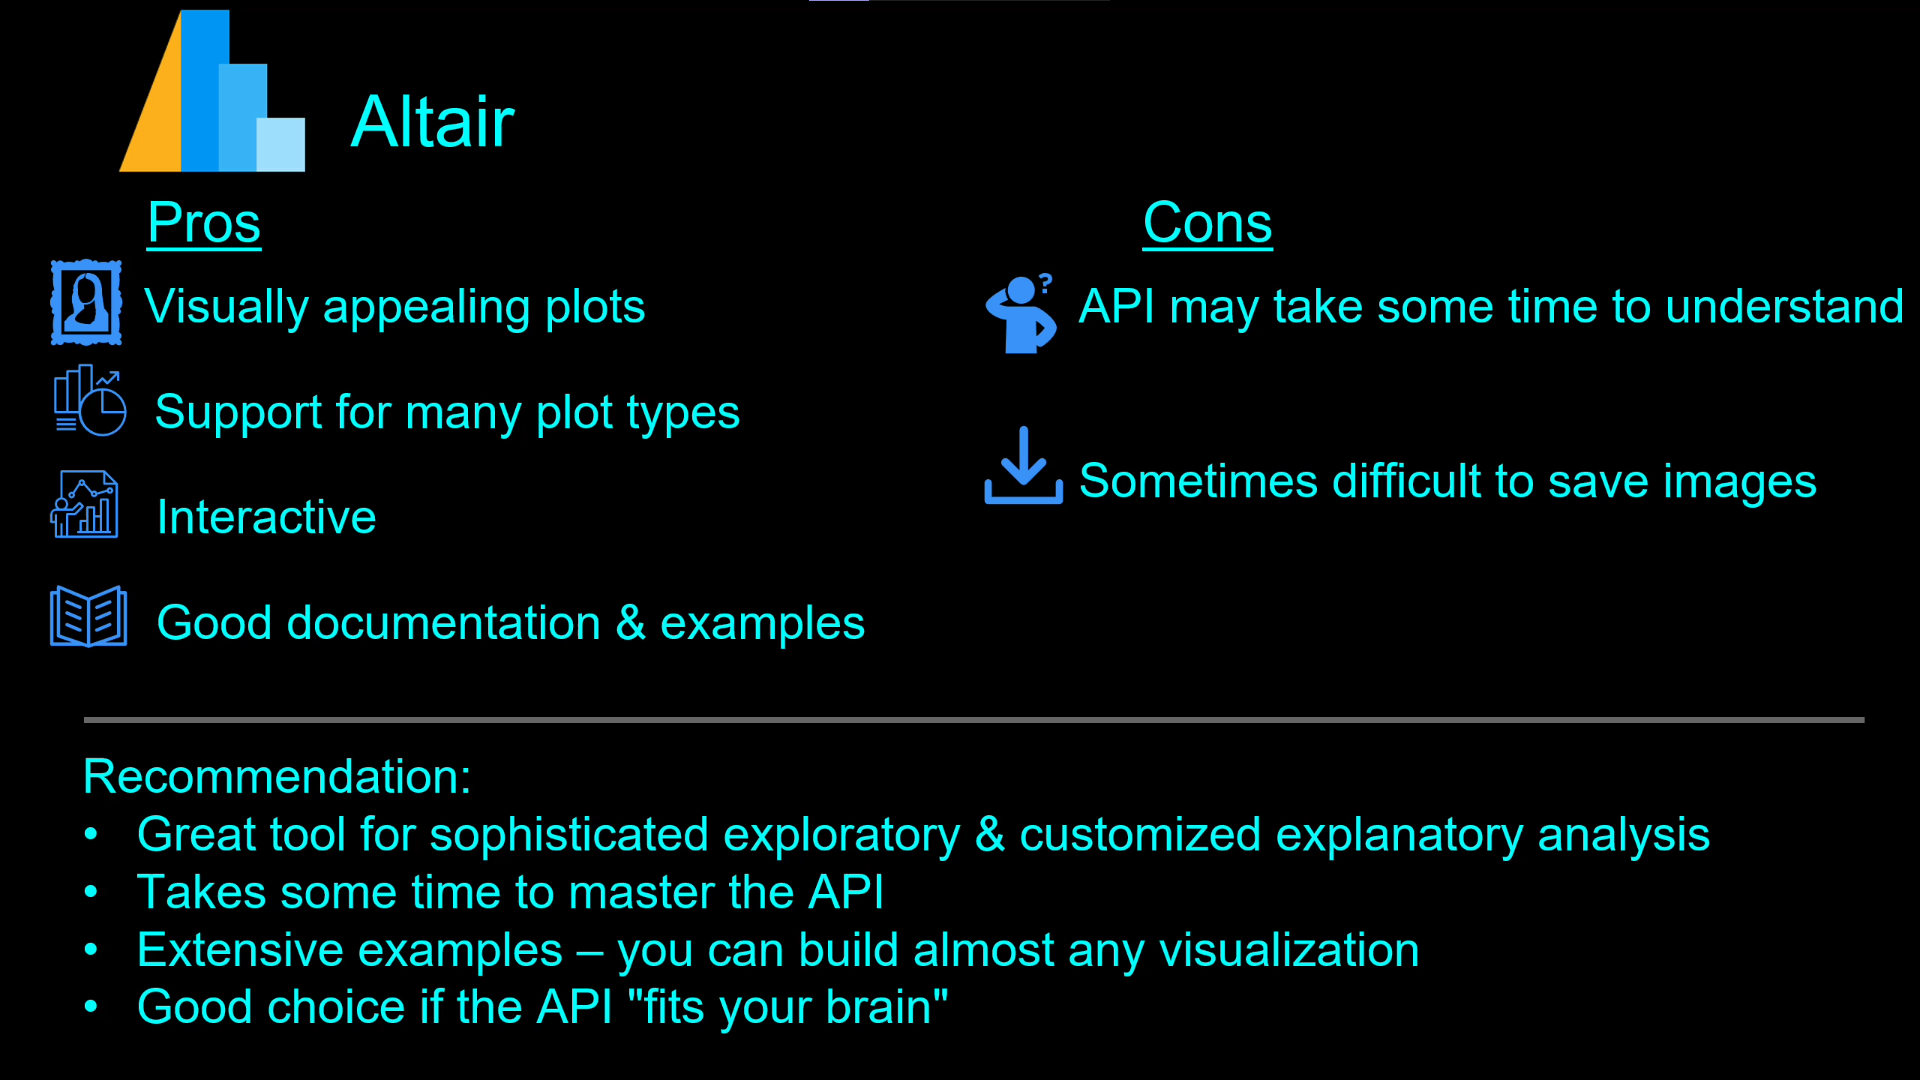